# Blanchard-Watson bubble

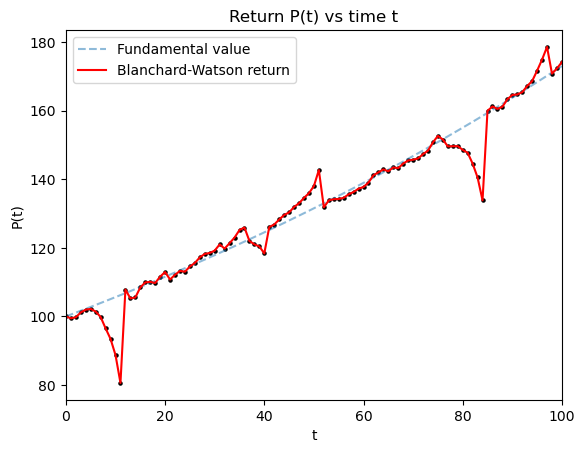

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# IID
def IID():
    return np.random.normal(0, 1)

# Initialize parameters
R = 0.1
p = 0.75
r = 2/365
steps = 100

# Write array simulating Blanchard-Watson bubble
def BW_bubble():
    step = np.array([0])
    B = np.array([0])
    
    for t in range(1, steps+1):
        rng = np.random.uniform(low=0, high=1)
        if rng < p:
            B_new = (1+R)/p * B[-1] + IID()
        else:
            B_new = IID()
    
        B = np.append(B, B_new)
        step = np.append(step, t)

    return step, B

step, B = BW_bubble()

P0 = 100 * np.exp(r * np.arange(0, steps+1))
P = P0 + B

# Plot
plt.plot(step, P0, linestyle='--', alpha=0.5, label='Fundamental value')
plt.plot(step, P, color='red', label='Blanchard-Watson return')
plt.scatter(step, P, color='black', s=5)

plt.xlabel('t')
plt.ylabel('P(t)')

plt.xlim(0, steps)
plt.legend()

plt.title('Return P(t) vs time t')
plt.show()

# Geometric Brownian Motion

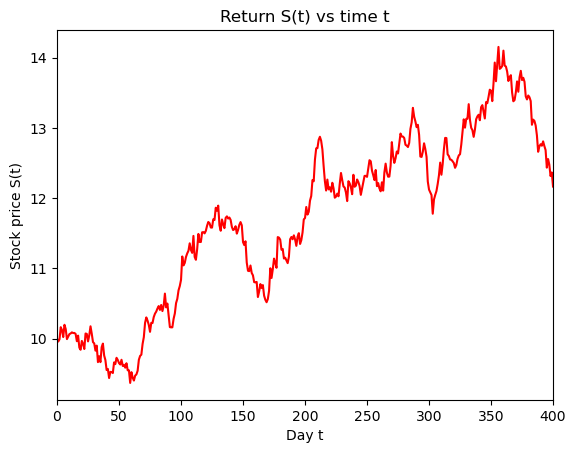

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize
dt = 1/365
S0 = 10
days = 400
mu = 0.1
sigma = 0.2 

# Write array simulating 400-day GBM
def GBM():
    S = np.array([S0])
    
    for t in np.arange(1, days+1):
        IID = np.random.normal(0, 1)
        S_new = S[-1] * (
           1 + (mu + 0.5*sigma**2) * dt + (sigma * IID * np.sqrt(dt))
        )
        
        S = np.append(S, S_new)
    return S

S = GBM()

# Plot
plt.plot(np.arange(0,days+1), S, color='red')

plt.xlabel('Day t')
plt.ylabel('Stock price S(t)')

plt.xlim(0, days)
plt.title('Return S(t) vs time t')
plt.show()